In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from model import *

In [3]:
num_mentors = 200
num_mentees = 500
num_matches = 100
num_features = 20

survey_features = np.random.rand(num_mentees, num_features)
matches = np.random.randint([num_mentors, num_mentees], size=(num_matches, 2))
matches_outcome = np.random.rand(num_matches)

In [4]:
source = matches
target = matches_outcome
source = torch.Tensor(source).int()
target = torch.Tensor(target).float()

In [5]:
model = Model(num_mentors, num_mentees)
optimizer = torch.optim.AdamW(model.parameters())
criterion = nn.MSELoss()

In [6]:
epochs = 1000
batches = 20
batch_size = int(len(source)/batches)

In [7]:
model.train()
for epoch in range(epochs):
    for _ in range(batches):
        idx = np.random.choice(range(len(source)), batch_size, replace=False)
        optimizer.zero_grad()
        input_data = torch.t(source[idx])
        logits = model(*input_data)
        loss = criterion(logits, target[idx])
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(loss)
model.eval();

tensor(0.7789, grad_fn=<MseLossBackward0>)
tensor(0.0548, grad_fn=<MseLossBackward0>)
tensor(0.0042, grad_fn=<MseLossBackward0>)
tensor(0.0007, grad_fn=<MseLossBackward0>)
tensor(1.7592e-11, grad_fn=<MseLossBackward0>)
tensor(1.7479e-13, grad_fn=<MseLossBackward0>)
tensor(1.8059e-11, grad_fn=<MseLossBackward0>)
tensor(9.5332e-07, grad_fn=<MseLossBackward0>)
tensor(4.5662e-07, grad_fn=<MseLossBackward0>)
tensor(6.7521e-07, grad_fn=<MseLossBackward0>)


Model(
  (mentors): Embedding(200, 10)
  (mentees): Embedding(500, 10)
)

In [8]:
input_data = torch.t(source)
predicted = model(*input_data).detach().cpu().numpy()
actual = target

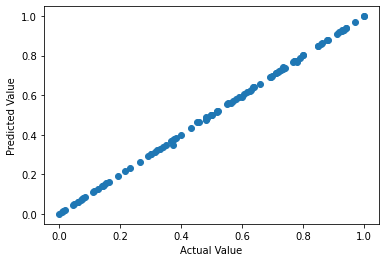

In [9]:
plt.scatter(actual, predicted)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');